### Install Necessary Libraries
In this step, we are installing the required libraries for data manipulation, visualization, and cleaning:
- **pandas**: For data manipulation and analysis
- **numpy**: For numerical operations
- **matplotlib**: For visualizations
- **seaborn**: For statistical data visualization

In [23]:
!pip install pandas numpy matplotlib seaborn

### Import Required Libraries
We import all necessary libraries for data manipulation, analysis, and visualization.

In [24]:
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import re

# Set display options for better output formatting
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)

### Load the Dataset
Load the raw Audible dataset to begin our cleaning process.

In [25]:
# Load the dataset from the specified path
data = pd.read_csv('audible_uncleaned.csv')

# Display basic information about the dataset
print(f"Dataset shape: {data.shape}")
print(f"Columns: {list(data.columns)}")

# Display the first few rows to understand the structure
print("\nFirst 5 rows of the dataset:")
data.head()

Dataset shape: (87489, 8)
Columns: ['name', 'author', 'narrator', 'time', 'releasedate', 'language', 'stars', 'price']

First 5 rows of the dataset:


,name,author,narrator,time,releasedate,language,stars,price
0,Geronimo Stilton #11 & #12,Writtenby:GeronimoStilton,Narratedby:BillLobely,2 hrs and 20 mins,04-08-08,English,5 out of 5 stars34 ratings,468.00
1,The Burning Maze,Writtenby:RickRiordan,Narratedby:RobbieDaymond,13 hrs and 8 mins,01-05-18,English,4.5 out of 5 stars41 ratings,820.00
2,The Deep End,Writtenby:JeffKinney,Narratedby:DanRussell,2 hrs and 3 mins,06-11-20,English,4.5 out of 5 stars38 ratings,410.00
3,Daughter of the Deep,Writtenby:RickRiordan,Narratedby:SoneelaNankani,11 hrs and 16 mins,05-10-21,English,4.5 out of 5 stars12 ratings,615.00
4,"The Lightning Thief: Percy Jackson, Book 1",Writtenby:RickRiordan,Narratedby:JesseBernstein,10 hrs,13-01-10,English,4.5 out of 5 stars181 ratings,820.00


### 2.1 Identify Missing Values
Before cleaning, we need to understand what data quality issues exist in our dataset.

In [26]:
# Identify missing values in the dataset
missing_values = data.isnull().sum()

# Display missing values count per column
print("Missing Values per Column:")
print(missing_values)
print(f"\nTotal missing values: {missing_values.sum()}")
print(f"Percentage of missing data: {(missing_values.sum() / (data.shape[0] * data.shape[1])) * 100:.2f}%")

Missing Values per Column:
name           0
author         0
narrator       0
time           0
releasedate    0
language       0
stars          0
price          0
dtype: int64

Total missing values: 0
Percentage of missing data: 0.00%


### 2.2 Detect Duplicate Rows
Duplicate entries can skew our analysis, so we need to identify and handle them.

In [27]:
# Detect duplicate rows
duplicates = data.duplicated().sum()

# Display the number of duplicate rows
print(f"Number of duplicate rows: {duplicates}")
print(f"Percentage of duplicates: {(duplicates / len(data)) * 100:.2f}%")

if duplicates > 0:
    print("\nSample duplicate rows:")
    print(data[data.duplicated(keep=False)].head())

Number of duplicate rows: 0
Percentage of duplicates: 0.00%


### 2.3 Check Data Types
Examining data types helps us identify columns that need type conversion or formatting issues.

In [28]:
# Check data types of all columns to spot any inconsistent data formats
print("Data Types per Column:")
print(data.dtypes)
print("\nSample data from each column:")
for col in data.columns:
    print(f"\n{col}: {data[col].dropna().iloc[0] if not data[col].dropna().empty else 'No data'}")

Data Types per Column:
name           object
author         object
narrator       object
time           object
releasedate    object
language       object
stars          object
price          object
dtype: object

Sample data from each column:

name: Geronimo Stilton #11 & #12

author: Writtenby:GeronimoStilton

narrator: Narratedby:BillLobely

time: 2 hrs and 20 mins

releasedate: 04-08-08

language: English

stars: 5 out of 5 stars34 ratings

price: 468.00


### 3.1 Remove Duplicate Rows
Remove all duplicate rows while keeping the first occurrence.

In [29]:
# Store initial count for comparison
initial_rows = len(data)

# Remove duplicate rows
data.drop_duplicates(inplace=True)

# Calculate rows removed
rows_removed = initial_rows - len(data)

print(f"Number of duplicate rows removed: {rows_removed}")
print(f"Dataset shape after removing duplicates: {data.shape}")
print("\nDataset after removing duplicates:")
data.head()

Number of duplicate rows removed: 0
Dataset shape after removing duplicates: (87489, 8)

Dataset after removing duplicates:


,name,author,narrator,time,releasedate,language,stars,price
0,Geronimo Stilton #11 & #12,Writtenby:GeronimoStilton,Narratedby:BillLobely,2 hrs and 20 mins,04-08-08,English,5 out of 5 stars34 ratings,468.00
1,The Burning Maze,Writtenby:RickRiordan,Narratedby:RobbieDaymond,13 hrs and 8 mins,01-05-18,English,4.5 out of 5 stars41 ratings,820.00
2,The Deep End,Writtenby:JeffKinney,Narratedby:DanRussell,2 hrs and 3 mins,06-11-20,English,4.5 out of 5 stars38 ratings,410.00
3,Daughter of the Deep,Writtenby:RickRiordan,Narratedby:SoneelaNankani,11 hrs and 16 mins,05-10-21,English,4.5 out of 5 stars12 ratings,615.00
4,"The Lightning Thief: Percy Jackson, Book 1",Writtenby:RickRiordan,Narratedby:JesseBernstein,10 hrs,13-01-10,English,4.5 out of 5 stars181 ratings,820.00


### 3.2 Standardize Language Column
Capitalize the first letter of each word in the 'language' column.

In [30]:
# Capitalize the first letter of each word in the 'language' column
data['language'] = data['language'].str.capitalize()

# Display the updated 'language' column
print("Updated 'language' column:")
print(data['language'].value_counts())

Updated 'language' column:
language
English             61884
German               8295
Spanish              3496
Japanese             3167
Italian              2694
French               2386
Russian              1804
Danish                935
Portuguese            526
Swedish               515
Hindi                 436
Polish                224
Finnish               197
Dutch                 190
Tamil                 161
Catalan               153
Mandarin_chinese       97
Icelandic              52
Romanian               50
Hungarian              36
Urdu                   34
Afrikaans              28
Czech                  23
Turkish                20
Greek                  18
Arabic                 16
Norwegian              16
Galician               10
Bulgarian               9
Slovene                 4
Korean                  4
Hebrew                  2
Basque                  2
Telugu                  2
Lithuanian              2
Ukrainian               1
Name: count, dtype: int64


### 3.3 Clean Author and Narrator Names
Create a function to standardize name formatting.

In [31]:
# Insert a space between the first and last name and after the comma
def format_names(name):
    """
    Clean and format names by:
    1. Adding space after commas
    2. Adding space between CamelCase words (FirstnameLastname -> Firstname Lastname)
    """
    if pd.isna(name):
        return name
    
    # Add a space after the comma
    name = name.replace(",", ", ")
    
    # Insert space between first and last name by capitalizing where the uppercase starts
    # Using regex to insert space before each uppercase letter that follows a lowercase letter
    name = re.sub(r'([a-z])([A-Z])', r'\1 \2', name)
    
    return name

# Apply the function to the 'author' column
print("Original author format:", data['author'].iloc[0])
data['author'] = data['author'].apply(format_names)
print("Formatted author:", data['author'].iloc[0])

print("\nUpdated 'author' column with formatted names:")
print(data[['author']].head())

Original author format: Writtenby:GeronimoStilton
Formatted author: Writtenby:Geronimo Stilton

Updated 'author' column with formatted names:
                       author
0  Writtenby:Geronimo Stilton
1      Writtenby:Rick Riordan
2       Writtenby:Jeff Kinney
3      Writtenby:Rick Riordan
4      Writtenby:Rick Riordan


In [32]:
# Apply the same function to the 'narrator' column
print("Original narrator format:", data['narrator'].iloc[0])
data['narrator'] = data['narrator'].apply(format_names)
print("Formatted narrator:", data['narrator'].iloc[0])

print("\nUpdated 'narrator' column with formatted names:")
print(data[['narrator']].head())

Original narrator format: Narratedby:BillLobely
Formatted narrator: Narratedby:Bill Lobely

Updated 'narrator' column with formatted names:
                     narrator
0      Narratedby:Bill Lobely
1   Narratedby:Robbie Daymond
2      Narratedby:Dan Russell
3  Narratedby:Soneela Nankani
4  Narratedby:Jesse Bernstein


### 3.4 Remove Prefixes from Author and Narrator Columns
Strip prefixes and clean up extra whitespace.

In [33]:
# Remove 'Writtenby:' from the 'author' column
data['author'] = data['author'].str.replace('Writtenby:', '', regex=False)

# Remove 'Narratedby:' from the 'narrator' column  
data['narrator'] = data['narrator'].str.replace('Narratedby:', '', regex=False)

# Clean up any extra spaces
data['author'] = data['author'].str.strip()
data['narrator'] = data['narrator'].str.strip()

# Display the cleaned 'author' and 'narrator' columns
print("Cleaned 'author' and 'narrator' columns:")
print(data[['author', 'narrator']].head())

Cleaned 'author' and 'narrator' columns:
             author         narrator
0  Geronimo Stilton      Bill Lobely
1      Rick Riordan   Robbie Daymond
2       Jeff Kinney      Dan Russell
3      Rick Riordan  Soneela Nankani
4      Rick Riordan  Jesse Bernstein


### 3.5 Convert Time Format to Minutes
Convert all time values to total minutes for consistent numerical analysis.

In [34]:
def convert_time_to_minutes(time_str):
    """
    Convert time format from "X hrs and Y mins" to total minutes.
    Handles various formats:
    - "2 hrs and 20 mins" -> 140 minutes
    - "1 hr and 30 mins" -> 90 minutes
    - "45 mins" -> 45 minutes
    """
    if pd.isna(time_str):
        return 0
    
    # Use regex to extract hours and minutes
    hours = 0
    minutes = 0
    time_parts = time_str.split(' and ')
    
    for part in time_parts:
        if 'hr' in part:
            hours_match = re.search(r'(\d+)', part)
            if hours_match:
                hours = int(hours_match.group())
        elif 'min' in part:
            minutes_match = re.search(r'(\d+)', part)
            if minutes_match:
                minutes = int(minutes_match.group())
    
    # Calculate total minutes
    total_minutes = (hours * 60) + minutes
    return total_minutes

# Show before and after conversion
print("Before conversion:")
print(data['time'].head())

# Apply the function to replace 'time' column with total minutes
data['time'] = data['time'].apply(convert_time_to_minutes)

print("\nAfter conversion to minutes:")
print(data['time'].head())

# Check the data types and the updated 'time' column
print(f"\nTime column statistics:")
print(f"Average duration: {data['time'].mean():.1f} minutes ({data['time'].mean()/60:.1f} hours)")
print(f"Range: {data['time'].min()} - {data['time'].max()} minutes")

Before conversion:
0     2 hrs and 20 mins
1     13 hrs and 8 mins
2      2 hrs and 3 mins
3    11 hrs and 16 mins
4                10 hrs
Name: time, dtype: object

After conversion to minutes:
0    140
1    788
2    123
3    676
4    600
Name: time, dtype: int64

Time column statistics:
Average duration: 417.5 minutes (7.0 hours)
Range: 1 - 8595 minutes


### 3.6 Convert Release Date to Proper DateTime Format
Convert the releasedate column from string to datetime format.

In [35]:
# Show original format
print("Original release date format:")
print(data['releasedate'].head())

# Convert 'releasedate' to datetime format
data['releasedate'] = pd.to_datetime(data['releasedate'], errors='coerce')

print("\nAfter datetime conversion:")
print(data['releasedate'].head())
print(f"\nData type: {data['releasedate'].dtype}")

# Check for any conversion errors
conversion_errors = data['releasedate'].isna().sum()
print(f"Conversion errors (NaT values): {conversion_errors}")

Original release date format:
0    04-08-08
1    01-05-18
2    06-11-20
3    05-10-21
4    13-01-10
Name: releasedate, dtype: object


/tmp/ipykernel_2716/4181980728.py:6: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['releasedate'] = pd.to_datetime(data['releasedate'], errors='coerce')



After datetime conversion:
0   2008-04-08
1   2018-01-05
2   2020-06-11
3   2021-05-10
4   2010-01-13
Name: releasedate, dtype: datetime64[ns]

Data type: datetime64[ns]
Conversion errors (NaT values): 0


### 4.1 Extract Star Ratings and Number of Ratings
Use regex to extract star rating and number of ratings into separate columns.

In [36]:
# Step 1: Rename the original 'stars' column to preserve the source text
data.rename(columns={'stars': 'stars_original_text'}, inplace=True, errors='ignore')

# Step 2: Ensure the source text column is a string type
data['stars_original_text'] = data['stars_original_text'].astype(str)

print("Original stars format:")
print(data['stars_original_text'].head())

# Step 3: Define the regular expression pattern for the format "X out of 5 starsY ratings"
pattern = r'(?P<star_rating>\d\.?\d*)\s*out of 5 stars(?P<num_ratings>\d+)\s*ratings'

# Step 4: Use .str.extract() to pull the data into new columns based on the pattern
extracted_data = data['stars_original_text'].str.extract(pattern)

# Step 5: Create the new columns and convert them to numeric types
data['star_rating'] = pd.to_numeric(extracted_data['star_rating'], errors='coerce')
data['num_ratings'] = pd.to_numeric(extracted_data['num_ratings'], errors='coerce')

# Step 6: Replace any resulting empty (NaN) values in the new columns with 0
data.fillna({'star_rating': 0, 'num_ratings': 0}, inplace=True)

# Step 7: Convert 'num_ratings' to a whole number (integer)
data['num_ratings'] = data['num_ratings'].astype(int)

print("\nData Transformation Result:")
print(data[['stars_original_text', 'star_rating', 'num_ratings']].head())

Original stars format:
0       5 out of 5 stars34 ratings
1     4.5 out of 5 stars41 ratings
2     4.5 out of 5 stars38 ratings
3     4.5 out of 5 stars12 ratings
4    4.5 out of 5 stars181 ratings
Name: stars_original_text, dtype: object

Data Transformation Result:
             stars_original_text  star_rating  num_ratings
0     5 out of 5 stars34 ratings          5.0           34
1   4.5 out of 5 stars41 ratings          4.5           41
2   4.5 out of 5 stars38 ratings          4.5           38
3   4.5 out of 5 stars12 ratings          4.5           12
4  4.5 out of 5 stars181 ratings          4.5          181


### 4.2 Finalize Star Rating Columns
Round star ratings and rename columns for clarity.

In [37]:
# Round the star_rating column to one decimal place
data['star_rating'] = data['star_rating'].round(1)

# Rename the final columns for clarity
data.rename(columns={'star_rating': 'stars', 'num_ratings': 'ratings'}, inplace=True)

# Display the result
print("Final stars and ratings columns:")
print(data[['stars', 'ratings']].head())

# Show statistics
print(f"\nStar ratings statistics:")
print(f"Average rating: {data['stars'].mean():.2f}")
print(f"Rating distribution:")
print(data['stars'].value_counts().sort_index())

Final stars and ratings columns:
   stars  ratings
0    5.0       34
1    4.5       41
2    4.5       38
3    4.5       12
4    4.5      181

Star ratings statistics:
Average rating: 0.47
Rating distribution:
stars
0.0    78278
1.0       11
1.5        8
2.0       27
2.5       47
3.0      201
3.5      413
4.0     1473
4.5     4018
5.0     3013
Name: count, dtype: int64


### 5.1 Clean and Standardize Price Data
Remove non-numeric characters and convert to proper numeric format.

In [38]:
print("Original price format:")
print(data['price'].head())

# Remove any non-numeric characters (e.g., commas, dollar signs)
data['price'] = data['price'].astype(str).str.replace(r'[^\d.]', '', regex=True)

# Convert the price column to numeric
data['price'] = pd.to_numeric(data['price'], errors='coerce')

# Handle any NaN values that might result from conversion
data['price'] = data['price'].fillna(0)

# Round the 'price' column to 2 decimal places
data['price'] = data['price'].round(2)

print("\nCleaned price column:")
print(data['price'].head())

# Show price statistics
print(f"\nPrice statistics:")
print(f"Average price: ${data['price'].mean():.2f}")
print(f"Price range: ${data['price'].min():.2f} - ${data['price'].max():.2f}")
print(f"Median price: ${data['price'].median():.2f}")

Original price format:
0    468.00
1    820.00
2    410.00
3    615.00
4    820.00
Name: price, dtype: object

Cleaned price column:
0    468.0
1    820.0
2    410.0
3    615.0
4    820.0
Name: price, dtype: float64

Price statistics:
Average price: $559.01
Price range: $0.00 - $7198.00
Median price: $585.00


### 6.1 Remove Unnecessary Columns and Rename for Clarity
Drop the original text column and rename columns for better readability.*

In [39]:
# Drop the 'stars_original_text' column as it's no longer needed
data = data.drop(columns=['stars_original_text'])

# Rename columns for better clarity and consistency
data.rename(columns={
    'time': 'time_minutes', 
    'releasedate': 'release_date'
}, inplace=True)

print("Final dataset structure:")
print(f"Shape: {data.shape}")
print(f"Columns: {list(data.columns)}")

# Display the final cleaned dataset
print("\nFinal cleaned dataset:")
data.head()

print("Checking for duplicates created during cleaning...")
duplicates_after_cleaning = data.duplicated().sum()
if duplicates_after_cleaning > 0:
    print(f"Found {duplicates_after_cleaning} duplicates created during cleaning")
    data = data.drop_duplicates()
    print(f"Removed duplicates. New shape: {data.shape}")

Final dataset structure:
Shape: (87489, 9)
Columns: ['name', 'author', 'narrator', 'time_minutes', 'release_date', 'language', 'price', 'stars', 'ratings']

Final cleaned dataset:
Checking for duplicates created during cleaning...
Found 6 duplicates created during cleaning
Removed duplicates. New shape: (87483, 9)


### 7.1 Final Data Quality Check
Perform comprehensive quality checks on the cleaned dataset.

In [40]:
print("=== FINAL DATA QUALITY REPORT ===")
print(f"Dataset shape: {data.shape}")
print(f"Memory usage: {data.memory_usage(deep=True).sum() / 1024**2:.2f} MB")

print("\n1. Missing Values:")
missing_final = data.isnull().sum()
print(missing_final[missing_final > 0] if missing_final.sum() > 0 else "No missing values!")

print("\n2. Duplicate Rows:")
duplicates_final = data.duplicated().sum()
print(f"No duplicates!" if duplicates_final == 0 else f"{duplicates_final} duplicates found")

print("\n3. Data Types:")
print(data.dtypes)

print("\n4. Data Summary Statistics:")
print(data.describe(include='all'))

=== FINAL DATA QUALITY REPORT ===
Dataset shape: (87483, 9)
Memory usage: 27.22 MB

1. Missing Values:
No missing values!

2. Duplicate Rows:
No duplicates!

3. Data Types:
name                    object
author                  object
narrator                object
time_minutes             int64
release_date    datetime64[ns]
language                object
price                  float64
stars                  float64
ratings                  int64
dtype: object

4. Data Summary Statistics:
                  name     author   narrator  time_minutes  \
count            87483      87483      87483  87483.000000   
unique           82767      48374      29717           NaN   
top     The Art of War  矢島雅弘, 石橋遊  anonymous           NaN   
freq                20        874       1034           NaN   
mean               NaN        NaN        NaN    417.494062   
min                NaN        NaN        NaN      1.000000   
25%                NaN        NaN        NaN    142.000000   
50%      

### 7.2 Save Cleaned Dataset
Export the cleaned dataset to a new CSV file.

In [41]:
# Save the cleaned dataset
output_filename = 'audible_cleaned_final.csv'
data.to_csv(output_filename, index=False)

print(f"Cleaned dataset saved as '{output_filename}'")
print(f"Final dataset: {data.shape[0]:,} rows × {data.shape[1]} columns")

# Create a summary of cleaning operations performed
cleaning_summary = {
    'Operation': [
        'Removed duplicate rows',
        'Standardized language capitalization', 
        'Formatted author/narrator names',
        'Removed text prefixes',
        'Converted time to minutes',
        'Converted dates to datetime',
        'Extracted star ratings',
        'Cleaned price format',
        'Renamed columns for clarity'
    ],
    'Impact': [
        f'{rows_removed} rows removed',
        'Consistent capitalization',
        'Proper name spacing',
        'Clean text fields',
        'Numerical time analysis ready',
        'Date analysis ready', 
        'Separate rating metrics',
        'Numerical price analysis ready',
        'Improved readability'
    ]
}

cleaning_df = pd.DataFrame(cleaning_summary)
print("\n=== CLEANING OPERATIONS SUMMARY ===")
print(cleaning_df.to_string(index=False))

Cleaned dataset saved as 'audible_cleaned_final.csv'
Final dataset: 87,483 rows × 9 columns

=== CLEANING OPERATIONS SUMMARY ===
                           Operation                         Impact
              Removed duplicate rows                 0 rows removed
Standardized language capitalization      Consistent capitalization
     Formatted author/narrator names            Proper name spacing
               Removed text prefixes              Clean text fields
           Converted time to minutes  Numerical time analysis ready
         Converted dates to datetime            Date analysis ready
              Extracted star ratings        Separate rating metrics
                Cleaned price format Numerical price analysis ready
         Renamed columns for clarity           Improved readability


### 8.1 Language Distribution Analysis
Create a pie chart showing the distribution of audiobooks by language, grouping smaller languages into "Other Languages" for clarity.

Language distribution (raw counts):
language
English             61878
German               8295
Spanish              3496
Japanese             3167
Italian              2694
French               2386
Russian              1804
Danish                935
Portuguese            526
Swedish               515
Hindi                 436
Polish                224
Finnish               197
Dutch                 190
Tamil                 161
Catalan               153
Mandarin_chinese       97
Icelandic              52
Romanian               50
Hungarian              36
Urdu                   34
Afrikaans              28
Czech                  23
Turkish                20
Greek                  18
Arabic                 16
Norwegian              16
Galician               10
Bulgarian               9
Slovene                 4
Korean                  4
Hebrew                  2
Basque                  2
Telugu                  2
Lithuanian              2
Ukrainian               1
Name: count, dtype:

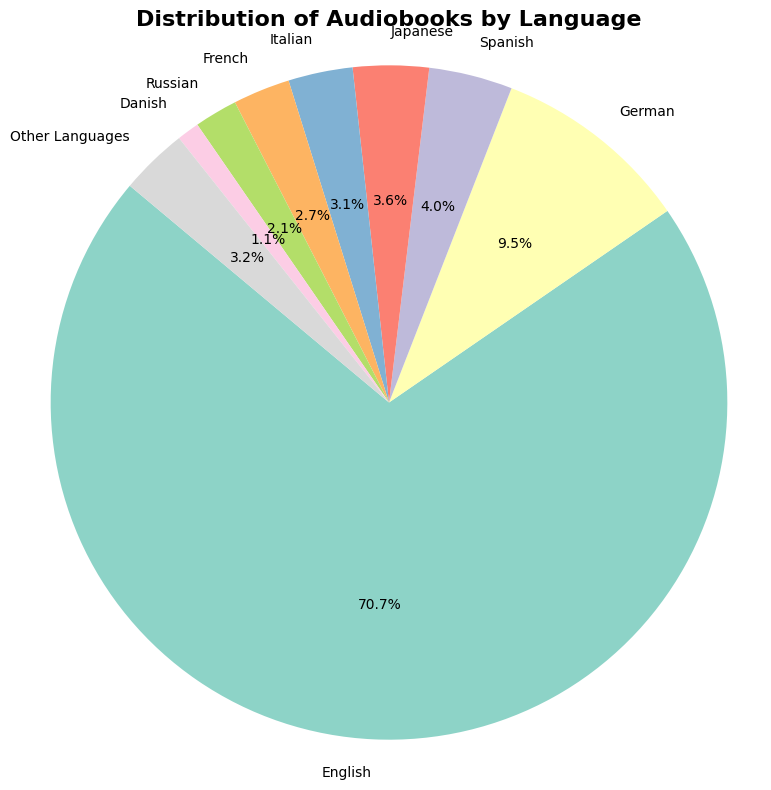


Insight: The dataset contains audiobooks in 36 different languages
Market Focus: English dominates with 70.7% of all audiobooks


In [42]:
import matplotlib.pyplot as plt
import pandas as pd

# Count number of audiobooks per language
language_counts = data['language'].value_counts()

# Compute total count for percentage calculation
total = language_counts.sum()

print("Language distribution (raw counts):")
print(language_counts)

# Separate languages with ≥1% and group others
threshold = 0.01  # 1%
main_languages = language_counts[language_counts / total >= threshold]
other_languages = language_counts[language_counts / total < threshold]

print(f"\nLanguages representing ≥1% of data: {len(main_languages)}")
print(f"Languages grouped as 'Other': {len(other_languages)}")

# Add "Other Languages" as a merged entry
language_counts_cleaned = main_languages.copy()
if len(other_languages) > 0:
    language_counts_cleaned['Other Languages'] = other_languages.sum()

# Plot updated pie chart
plt.figure(figsize=(8, 8))
plt.pie(language_counts_cleaned, 
        labels=language_counts_cleaned.index, 
        autopct='%1.1f%%', 
        startangle=140,
        colors=plt.cm.Set3.colors)
plt.title('Distribution of Audiobooks by Language', fontsize=16, fontweight='bold')
plt.axis('equal')  # Ensures the pie is circular
plt.tight_layout()
plt.show()

print(f"\nInsight: The dataset contains audiobooks in {len(language_counts)} different languages")
print(f"Market Focus: {language_counts.index[0]} dominates with {(language_counts.iloc[0]/total)*100:.1f}% of all audiobooks")

### 8.2 Top Authors by Average Rating Analysis
Analyze and visualize the top 10 authors based on their average ratings.

Top 10 Authors by Average Number of Ratings (Popularity):
                                          author  ratings
0                           Chris Voss, Tahl Raz    882.0
1                    Eric Jorgenson, Tim Ferriss    857.0
2             Paulo Coelho, Anu Singh-translator    841.0
3  Stephen Fry-introductions, Arthur Conan Doyle    838.0
4                                Daniel Kahneman    683.0
5                        Will Smith, Mark Manson    591.0
6                                   Chris Bailey    574.4
7                                 Paul Kalanithi    551.0
8                                   Mark Douglas    540.0
9         Girish Kuber, Vikrant Pande-translator    538.0


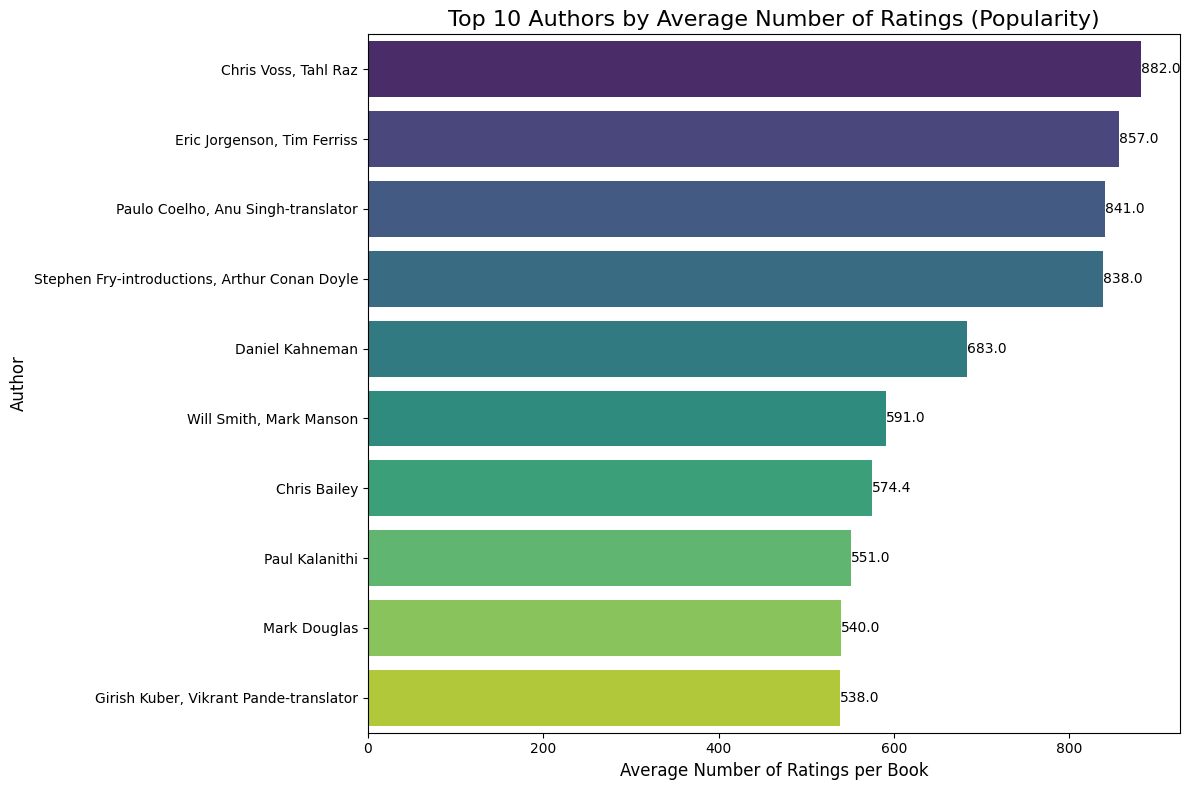


Popularity Analysis Summary:
Total unique authors in dataset: 48374
Average popularity among top 10: 689.5 ratings per book
Most popular author: Chris Voss, Tahl Raz (882.0 avg ratings)


In [43]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Compute and sort average number of ratings per author
author_ratings = data.groupby('author')['ratings'].mean().sort_values(ascending=False).head(10).round(2)
author_df = author_ratings.reset_index()  # Convert to DataFrame for plotting

print("Top 10 Authors by Average Number of Ratings (Popularity):")
print(author_df)

# Plot
plt.figure(figsize=(12, 8))
sns.barplot(
    data=author_df,
    x='ratings',              
    y='author',               
    hue='author',             # Assign hue to match palette with y-values
    palette='viridis',        
    legend=False              # Hide legend since author names are already on y-axis
)

# Add Add text labels to bars
for index, value in enumerate(author_df['ratings']):
    plt.text(value + 0.01, index, str(value), va='center')

# Customize plot appearance
plt.title('Top 10 Authors by Average Number of Ratings (Popularity)', fontsize=16)
plt.xlabel('Average Number of Ratings per Book', fontsize=12)
plt.ylabel('Author', fontsize=12)
plt.tight_layout()  # Adjust layout to prevent label cutoff
plt.show()

# Display summary insights
total_authors = data['author'].nunique()
avg_popularity = author_df['ratings'].mean()
print(f"\nPopularity Analysis Summary:")
print(f"Total unique authors in dataset: {total_authors}")
print(f"Average popularity among top 10: {avg_popularity:.1f} ratings per book")
print(f"Most popular author: {author_df.iloc[0]['author']} ({author_df.iloc[0]['ratings']} avg ratings)")

### 8.3 Price Trend Analysis Over Time
Analyze and visualize the average price trends by release year.

Cleaning price data for trend analysis...
Current price data type: float64
Price range after cleaning: $0.00 - $7198.00
Year range: 1998 - 2025

Average Price by Year:
    release_year   price
18          2016  599.52
19          2017  602.79
20          2018  532.96
21          2019  596.73
22          2020  568.86
23          2021  554.43
24          2022  453.60
25          2023  906.50
26          2024  976.00
27          2025  976.00


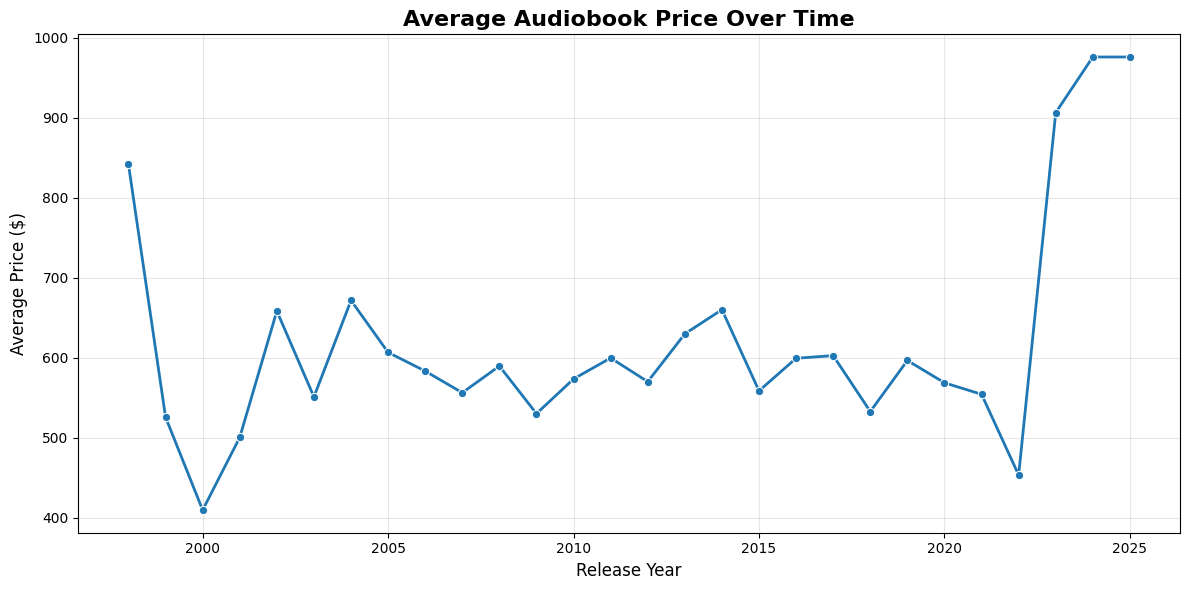


Price Trend Insights:
Price change from 1998.0 to 2025.0: $134.33


NameError: name 'recent_avg' is not defined

In [44]:
# Ensure price is properly cleaned and numeric
print("Cleaning price data for trend analysis...")
print(f"Current price data type: {data['price'].dtype}")

# Additional price cleaning if needed
data['price'] = data['price'].astype(str)

# Remove currency symbols and commas using a raw string
data['price'] = data['price'].str.replace(r'[\₱$,]', '', regex=True)

# Convert to numeric
data['price'] = pd.to_numeric(data['price'], errors='coerce')

# Handle any NaN values
price_na_count = data['price'].isna().sum()
if price_na_count > 0:
    print(f"Warning: {price_na_count} price values could not be converted to numeric")
    data['price'] = data['price'].fillna(data['price'].median())

print(f"Price range after cleaning: ${data['price'].min():.2f} - ${data['price'].max():.2f}")

# Extract year from release date
data['release_year'] = data['release_date'].dt.year

# Remove any invalid years
data = data.dropna(subset=['release_year'])
data['release_year'] = data['release_year'].astype(int)

print(f"Year range: {data['release_year'].min()} - {data['release_year'].max()}")

# Group by year and calculate average price
price_trend = data.groupby('release_year')['price'].mean().reset_index()
price_trend['price'] = price_trend['price'].round(2)

print("\nAverage Price by Year:")
print(price_trend.tail(10))  # Show last 10 years

# Plot line graph
plt.figure(figsize=(12, 6))
sns.lineplot(data=price_trend, x='release_year', y='price', marker='o', linewidth=2, markersize=6)
plt.title('Average Audiobook Price Over Time', fontsize=16, fontweight='bold')
plt.xlabel('Release Year', fontsize=12)
plt.ylabel('Average Price ($)', fontsize=12)
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Price trend insights
price_change = price_trend.iloc[-1]['price'] - price_trend.iloc[0]['price']
print(f"\nPrice Trend Insights:")
print(f"Price change from {price_trend.iloc[0]['release_year']} to {price_trend.iloc[-1]['release_year']}: ${price_change:.2f}")
print(f"Recent 5-year average: ${recent_avg:.2f}")
print(f"Overall average: ${overall_avg:.2f}")

### 8.4 Audiobook Release Trends Over Time
Analyze the number of audiobook releases per year to identify growth trends.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure we have clean column names (if not already done)
print("Current columns:", data.columns.tolist())

# Verify release_date column exists and is properly formatted
if 'release_date' in data.columns:
    print(f"Release date column type: {data['release_date'].dtype}")
    print(f"Sample release dates: {data['release_date'].dropna().head().tolist()}")
else:
    print("Warning: release_date column not found")

# Convert release_date to datetime if not already done
data['release_date'] = pd.to_datetime(data['release_date'], errors='coerce')

# Extract year from release_date (if not already done)
data['release_year'] = data['release_date'].dt.year

# Remove rows with invalid dates
initial_count = len(data)
data = data.dropna(subset=['release_year'])
final_count = len(data)
print(f"Removed {initial_count - final_count} rows with invalid dates")

# Group by release_year and count entries
release_trend = data.groupby('release_year').size().reset_index(name='release_count')

print("\nAudiobook Releases by Year:")
print(release_trend.tail(10))  # Show last 10 years

# Calculate growth metrics
total_releases = release_trend['release_count'].sum()
years_span = release_trend['release_year'].max() - release_trend['release_year'].min()
avg_per_year = total_releases / len(release_trend)

print(f"\nRelease Statistics:")
print(f"Total releases tracked: {total_releases}")
print(f"Years covered: {years_span} years ({release_trend['release_year'].min()}-{release_trend['release_year'].max()})")
print(f"Average releases per year: {avg_per_year:.1f}")

# Plotting the trend
plt.figure(figsize=(12, 6))
sns.lineplot(data=release_trend, x='release_year', y='release_count', 
             marker='o', color='royalblue', linewidth=2, markersize=6)

plt.title('Trends of Audiobook Releases Over the Years', fontsize=16, fontweight='bold')
plt.xlabel('Release Year', fontsize=12)
plt.ylabel('Number of Audiobook Releases', fontsize=12)
plt.grid(True, alpha=0.3)
plt.legend()

# Highlight peak years
peak_year = release_trend.loc[release_trend['release_count'].idxmax()]
plt.annotate(f'Peak: {peak_year["release_count"]} releases\nin {int(peak_year["release_year"])}',
             xy=(peak_year['release_year'], peak_year['release_count']),
             xytext=(peak_year['release_year']-2, peak_year['release_count']+5),
             arrowprops=dict(arrowstyle='->', color='red', alpha=0.7),
             fontsize=10, ha='center')

plt.tight_layout()
plt.show()

# Release trend insights
recent_5_years = release_trend[release_trend['release_year'] >= release_trend['release_year'].max() - 4]
recent_avg = recent_5_years['release_count'].mean()
early_5_years = release_trend[release_trend['release_year'] <= release_trend['release_year'].min() + 4]
early_avg = early_5_years['release_count'].mean()

print(f"\nGrowth Analysis:")
print(f"Peak year: {int(peak_year['release_year'])} with {peak_year['release_count']} releases")
print(f"Recent 5-year average: {recent_avg:.1f} releases/year")
print(f"Early 5-year average: {early_avg:.1f} releases/year")
if recent_avg > early_avg:
    growth_rate = ((recent_avg - early_avg) / early_avg) * 100
    print(f"Market growth: {growth_rate:.1f}% increase in recent years")

In [ ]:
### Save the Cleaned Dataset as a CSV File

In [ ]:
# Save the cleaned dataset to a CSV file
data.to_csv('ANLYTC1_FinalProject_AudibleCleaned.csv', index=False)